In [ ]:
import pandas as pd 
from sklearn.preprocessing import PowerTransformer
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Input,Flatten
from tensorflow.keras.layers import Dropout,LeakyReLU
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import Adamax
from matplotlib import pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras import activations
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
#from tensorflow.keras.optimizers import Adamdelta

In [ ]:

df = pd.read_csv("test_train_2events.csv")
df.head()

,Unnamed: 0,datetime,discharge_patapsco (catonsville),gage_height_patapsco (catonsville),discharge_patapsco (elkridge),gage_height_patapsco (elkridge),HourlyAltimeterSetting,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyPrecipitation,HourlyRelativeHumidity,HourlyStationPressure,HourlyVisibility,y,Unnamed: 0.1
0,0,7/25/16 0:00,53.5,10.27,61.8,5.21,29.97,73,79,0,82,29.80,10.00,0,NaN
1,1,7/25/16 0:15,53.5,10.27,61.8,5.21,29.97,73,79,0,82,29.80,10.00,0,NaN
2,2,7/25/16 0:30,53.5,10.27,61.8,5.21,29.95,74,80,0,82,29.74,9.94,0,NaN
3,3,7/25/16 0:45,53.5,10.27,61.8,5.21,29.95,74,80,0,82,29.74,9.94,0,NaN
4,4,7/25/16 1:00,53.5,10.27,61.8,5.21,29.95,74,80,0,82,29.74,9.94,0,NaN


In [ ]:
df.columns

Index(['Unnamed: 0', 'datetime', 'discharge_patapsco (catonsville)',
       'gage_height_patapsco (catonsville)', 'discharge_patapsco (elkridge)',
       'gage_height_patapsco (elkridge)', 'HourlyAltimeterSetting',
       'HourlyDewPointTemperature', 'HourlyDryBulbTemperature',
       'HourlyPrecipitation', 'HourlyRelativeHumidity',
       'HourlyStationPressure', 'HourlyVisibility', 'y', 'Unnamed: 0.1'],
      dtype='object')

In [ ]:
pd.set_option('display.max_rows', 500)

In [ ]:

df = df[['discharge_patapsco (catonsville)',
       'gage_height_patapsco (catonsville)', 'discharge_patapsco (elkridge)',
       'gage_height_patapsco (elkridge)', 'HourlyAltimeterSetting',
       'HourlyDewPointTemperature', 'HourlyDryBulbTemperature',
       'HourlyPrecipitation', 'HourlyRelativeHumidity',
       'HourlyStationPressure', 'HourlyVisibility', 'y']]
df.head()

,discharge_patapsco (catonsville),gage_height_patapsco (catonsville),discharge_patapsco (elkridge),gage_height_patapsco (elkridge),HourlyAltimeterSetting,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyPrecipitation,HourlyRelativeHumidity,HourlyStationPressure,HourlyVisibility,y
0,53.5,10.27,61.8,5.21,29.97,73,79,0,82,29.80,10.00,0
1,53.5,10.27,61.8,5.21,29.97,73,79,0,82,29.80,10.00,0
2,53.5,10.27,61.8,5.21,29.95,74,80,0,82,29.74,9.94,0
3,53.5,10.27,61.8,5.21,29.95,74,80,0,82,29.74,9.94,0
4,53.5,10.27,61.8,5.21,29.95,74,80,0,82,29.74,9.94,0


In [ ]:
#run this to understand counts to see how the wrong data is inside this column
#df['HourlyPrecipitation'].value_counts()

In [ ]:
#replacing t's with previous value

index = df.loc[df['HourlyPrecipitation']== "T",:].index

for i in index:
    if df['HourlyPrecipitation'][i] =="T":
        df['HourlyPrecipitation'][i] = df['HourlyPrecipitation'][i-1]

<ipython-input-7-b36020928a13>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HourlyPrecipitation'][i] = df['HourlyPrecipitation'][i-1]


In [ ]:
df['HourlyPrecipitation'].value_counts()

0       2063
0.01      68
0.07      17
0.04      17
0.02      17
0.06      16
0.09      12
0.67      10
0.05       9
0.21       9
0.03       8
0.33       8
0.1        4
0.18       4
0.58       2
0.08       2
0.11       2
0.59       2
0.13       2
0.25       2
1.24       1
0.12       1
0.37       1
0.3        1
0.19       1
0.24       1
0.4        1
0.14       1
0.42       1
Name: HourlyPrecipitation, dtype: int64

In [ ]:
df.columns = ['discharge_patapsco (catonsville)',
       'gage_height_patapsco (catonsville)', 'discharge_patapsco (elkridge)',
       'gage_height_patapsco (elkridge)', 'HourlyAltimeterSetting',
       'HourlyDewPointTemperature', 'HourlyDryBulbTemperature',
       'HourlyPrecipitation', 'HourlyRelativeHumidity',
       'HourlyStationPressure', 'HourlyVisibility', 'y']

In [ ]:
#normalizing
df[df.columns] = PowerTransformer(method='yeo-johnson', standardize=True, copy=True).fit_transform(df[df.columns])
print(df)


      discharge_patapsco (catonsville)  gage_height_patapsco (catonsville)  \
0                            -1.707914                           -1.708912   
1                            -1.707914                           -1.708912   
2                            -1.707914                           -1.708912   
3                            -1.707914                           -1.708912   
4                            -1.707914                           -1.708912   
...                                ...                                 ...   
2278                          0.427740                            0.707188   
2279                          0.420649                            0.701748   
2280                          0.420649                            0.701748   
2281                          0.413489                            0.696290   
2282                          0.413489                            0.696290   

      discharge_patapsco (elkridge)  gage_height_patapsco (elkr

/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [ ]:
#newly normalized data
df.head()

,discharge_patapsco (catonsville),gage_height_patapsco (catonsville),discharge_patapsco (elkridge),gage_height_patapsco (elkridge),HourlyAltimeterSetting,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyPrecipitation,HourlyRelativeHumidity,HourlyStationPressure,HourlyVisibility,y
0,-1.707914,-1.708912,-1.736313,-1.678168,0.000000,1.368802,0.527361,-0.319259,0.163776,0.0,0.692842,-0.445449
1,-1.707914,-1.708912,-1.736313,-1.678168,0.000000,1.368802,0.527361,-0.319259,0.163776,0.0,0.692842,-0.445449
2,-1.707914,-1.708912,-1.736313,-1.678168,-0.316902,1.656326,0.637666,-0.319259,0.163776,0.0,0.641716,-0.445449
3,-1.707914,-1.708912,-1.736313,-1.678168,-0.316902,1.656326,0.637666,-0.319259,0.163776,0.0,0.641716,-0.445449
4,-1.707914,-1.708912,-1.736313,-1.678168,-0.316902,1.656326,0.637666,-0.319259,0.163776,0.0,0.641716,-0.445449


In [ ]:
#graph function if we want to see loss every epoch

def plot_history(d_hist,g_hist):
    plt.subplot(1,1,1)
    plt.plot(d_hist,label = 'd')
    plt.plot(g_hist,label = 'gen')
    plt.show()
    plt.close()

In [ ]:
#add graph function into gan class
#d_history.append(d_loss)
#g_history.append(g_loss)

In [ ]:
class GAN():
    
    def __init__(self, gan_args):
        [self.batch_size, lr, self.noise_dim,
         self.data_dim, layers_dim] = gan_args

        self.generator = Generator(self.batch_size).\
            build_model(input_shape=(self.noise_dim,), dim=layers_dim, data_dim=self.data_dim)

        self.discriminator = Discriminator(self.batch_size).\
            build_model(input_shape=(self.data_dim,), dim=layers_dim)

        optimizer = Adam(lr, 0.5)

        
        self.discriminator.compile(loss='binary_crossentropy',
                                   optimizer=optimizer,
                                   metrics=['accuracy'])

        
        z = Input(shape=(self.noise_dim,))
        record = self.generator(z)

        
        self.discriminator.trainable = False

        
        validity = self.discriminator(record)

        
        self.combined = Model(z, validity)
        self.combined.compile(loss='binary_crossentropy', optimizer=optimizer)

    def get_data_batch(self, train, batch_size, seed=0):
        

        start_i = (batch_size * seed) % len(train)
        stop_i = start_i + batch_size
        shuffle_seed = (batch_size * seed) // len(train)
        np.random.seed(shuffle_seed)
        train_ix = np.random.choice(list(train.index), replace=False, size=len(train)) 
        train_ix = list(train_ix) + list(train_ix)  
        x = train.loc[train_ix[start_i: stop_i]].values
        return np.reshape(x, (batch_size, -1))
        
    def train(self, data, train_arguments):
        [cache_prefix, epochs, sample_interval] = train_arguments
        
        data_cols = data.columns

        
        valid = np.ones((self.batch_size, 1))
        fake = np.zeros((self.batch_size, 1))

        for epoch in range(epochs):    
           
            batch_data = self.get_data_batch(data, self.batch_size)
            noise = tf.random.normal((self.batch_size, self.noise_dim))

            
            gen_data = self.generator.predict(noise)
    
            
            d_loss_real = self.discriminator.train_on_batch(batch_data, valid)
            d_loss_fake = self.discriminator.train_on_batch(gen_data, fake)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
    
          
            noise = tf.random.normal((self.batch_size, self.noise_dim))
            
            g_loss = self.combined.train_on_batch(noise, valid)
    
            
            print("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100 * d_loss[1], g_loss))
            
            #d_history.append(d_loss)
            #g_history.append(g_loss)
            
            
            
            if epoch % sample_interval == 0:
                
                model_checkpoint_base_name = 'model/' + cache_prefix + '_{}_model_weights_step_{}.h5'
                self.generator.save_weights(model_checkpoint_base_name.format('generator', epoch))
                self.discriminator.save_weights(model_checkpoint_base_name.format('discriminator', epoch))

                
                z = tf.random.normal((432, self.noise_dim))
                gen_data = self.generator(z)
                print('generated_data')
    
class Generator():
    def __init__(self, batch_size):
        self.batch_size=batch_size
        
    def build_model(self, input_shape, dim, data_dim):
        input= Input(shape=input_shape, batch_size=self.batch_size)
        x = Dense(dim, activation='relu')(input)
        x = Dense(dim * 4, activation='relu')(x)
        x = Dense(data_dim)(x)
        return Model(inputs=input, outputs=x)

class Discriminator():
    def __init__(self,batch_size):
        self.batch_size=batch_size
    
    def build_model(self, input_shape, dim):
        input = Input(shape=input_shape, batch_size=self.batch_size)
        x = Dense(dim * 4, activation='relu')(input)
        x = Dropout(0.1)(x)
        x = Dense(dim * 2, activation='relu')(x)
        x = Dense(dim, activation='relu')(x)
        X = Flatten()
        x = Dropout(0.3)(x)
        x = Dense(1, activation='sigmoid')(x)
        return Model(inputs=input, outputs=x)

In [ ]:
#have to continute to do parameter tuning below 

In [ ]:
data_cols = df.columns
noise_dim = 32
dim = 128
#edit batch size 
batch_size = 32

log_step = 100
#edit epochs 
epochs = 1200
learning_rate = 5e-4
models_dir = 'model'

df[data_cols] = df[data_cols]

#print(df.shape[1])

gan_args = [batch_size, learning_rate, noise_dim, df.shape[1], dim]
train_args = ['', epochs, log_step]

In [ ]:
#training
model = GAN
synthesizer = model(gan_args)
synthesizer.train(df, train_args)

0 [D loss: 0.729019, acc.: 17.19%] [G loss: 0.698108]
generated_data
1 [D loss: 0.667407, acc.: 57.81%] [G loss: 0.693524]
2 [D loss: 0.661032, acc.: 51.56%] [G loss: 0.672484]
3 [D loss: 0.642489, acc.: 50.00%] [G loss: 0.628333]
4 [D loss: 0.655710, acc.: 50.00%] [G loss: 0.596503]
5 [D loss: 0.648809, acc.: 50.00%] [G loss: 0.598680]
6 [D loss: 0.644212, acc.: 50.00%] [G loss: 0.632298]
7 [D loss: 0.601506, acc.: 54.69%] [G loss: 0.722372]
8 [D loss: 0.566377, acc.: 60.94%] [G loss: 0.826107]
9 [D loss: 0.523480, acc.: 82.81%] [G loss: 0.878103]
10 [D loss: 0.529295, acc.: 75.00%] [G loss: 0.895070]
11 [D loss: 0.555464, acc.: 59.38%] [G loss: 0.903191]
12 [D loss: 0.550161, acc.: 64.06%] [G loss: 0.889424]
13 [D loss: 0.509411, acc.: 79.69%] [G loss: 1.020324]


KeyboardInterrupt: 

In [ ]:
#keep in mind this data is normalized!!

In [ ]:



seed = 17

#amount of new data we want to make 
test_size = 1000
noise_dim = 32

np.random.seed(seed)
z = np.random.normal(size=(test_size, noise_dim))
real = synthesizer.get_data_batch(train=df, batch_size=test_size, seed=seed)
real_samples = pd.DataFrame(real, columns=data_cols)
models = {'GAN': ['GAN', False, synthesizer.generator]}
[model_name,with_class,generator_model] = models['GAN']

g_z = generator_model.predict(z)
gen_samples = pd.DataFrame(g_z,columns = data_cols)
gen_samples.head(25)


,discharge_patapsco (catonsville),gage_height_patapsco (catonsville),discharge_patapsco (elkridge),gage_height_patapsco (elkridge),HourlyAltimeterSetting,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyPrecipitation,HourlyRelativeHumidity,HourlyStationPressure,HourlyVisibility,y
0,0.772336,0.739695,0.754164,0.724172,-0.352772,-0.329766,-1.158718,-0.436843,1.286614,-0.039304,0.870323,-0.534547
1,-1.670881,-1.761236,-1.847906,-1.748482,-0.575328,0.039346,1.617851,-0.384379,-1.384061,0.036280,0.840191,-0.502933
2,0.086873,0.044534,0.077198,0.181858,-0.024711,0.619327,-0.090771,-0.376915,0.644865,0.020914,0.707993,-0.487491
3,0.279459,0.315297,0.215738,0.197998,0.044462,0.363485,-0.557868,-0.326117,1.086507,-0.002068,-1.227507,-0.445785
4,-1.142897,-1.207057,-1.261927,-1.230424,-0.377978,0.694680,0.959938,-0.292505,-0.700651,-0.003773,0.464901,-0.364712
5,0.237000,0.365790,0.273446,0.276919,0.050863,0.510562,-0.311375,-0.327554,0.965623,0.030290,-0.028898,-0.421924
6,-1.804943,-1.913139,-1.995956,-1.964693,-0.573085,-0.172861,2.181212,-0.424077,-1.753876,0.043289,0.827580,-0.559465
7,0.454133,0.741002,0.441072,0.477940,0.308993,0.420024,-0.456607,-0.343312,1.152998,-0.004528,-1.003688,-0.462638
8,-1.425104,-1.496531,-1.513192,-1.477515,-0.531821,0.134990,1.331664,-0.340697,-1.148914,0.001678,0.690197,-0.436401
9,-1.542353,-1.619353,-1.703923,-1.611747,-0.602530,-0.018975,0.993011,-0.370577,-0.957464,0.004775,0.707540,-0.450576


In [ ]:
import pandas as pd
import random

In [ ]:
gen_samples['y'].quantile(np.linspace(.1, 1, 9, 0))

0.1   -0.550377
0.2   -0.518578
0.3   -0.502841
0.4   -0.486738
0.5   -0.474149
0.6   -0.460655
0.7   -0.449406
0.8   -0.435353
0.9   -0.420260
Name: y, dtype: float64

In [ ]:
gen_samples['y'].mean()

-0.4799148738384247

In [ ]:
# replace values in y so that it is 0 or 1
# we have to decide if we should do this now or after 
gen_samples['y'].values[gen_samples['y'].values > -.40] = 1
gen_samples['y'].values[gen_samples['y'].values < -.40] = 0

In [ ]:
df['y'].loc[df['y'] >0].count()

378

In [ ]:
#seeing distribution for new dataset
gen_samples['y'].value_counts()

0.0    963
1.0     37
Name: y, dtype: int64

In [ ]:
#seeing the distribution for original dataset
df['y'].value_counts()

-0.445449    1905
 2.244924     378
Name: y, dtype: int64

(array([  0.,   0.,   0.,   0.,   0.,   0.,  15., 242., 444., 213.,  86.,
          0.,   0.,   0.,   0.,   0.]),
 array([-4. , -3.5, -3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,
         1.5,  2. ,  2.5,  3. ,  3.5,  4. ]),
 <BarContainer object of 16 artists>)

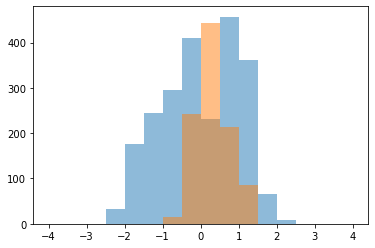

In [ ]:
# should follow same trend but should not match exactly 

a = df['HourlyDewPointTemperature']
b = gen_samples['HourlyDewPointTemperature']
plt.hist(a,alpha=.5,bins = [-4,-3.5,-3,-2.5,-2,-1.5,-1,-.5,0,.5,1,1.5,2,2.5,3,3.5,4])
plt.hist(b,alpha=.5,bins = [-4,-3.5,-3,-2.5,-2,-1.5,-1,-.5,0,.5,1,1.5,2,2.5,3,3.5,4])

In [ ]:
#exporting the new generated data to csv
#gen_samples.to_csv("gan_data3.csv")

# end of gan stuff